# Task 2
## To calibrate a camera using the chessboard pattern
## Obtain the intrinsic and extrinsic parameters and store them

In [1]:
# Importing the necessary libraries
import numpy as np
import cv2 as cv
import glob

In [2]:
# termination criteria
# 50 iterations with minimum accuracy being 0.001
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 50, 0.001)

In [3]:
# Assumed random object points in the form (x,y,z) where z = 0
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [4]:
# List to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.jpg')
print('Number of images used =', len(images))

Number of images used = 30


In [5]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    # ret stands for return value
    # Size of chessboard 7x6
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    
    # Adding the object points, image points after checking the below condition
    if ret == True:
        objpoints.append(objp)
        
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
        
cv.destroyAllWindows()

In [6]:
# The code below returns
# Camera matrix
# Distortion coefficients
# Rotation vector
# Translation vector
ret, cmtx, dist, rot, trans = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [7]:
print('Camera matrix:')
cmtx

Camera matrix:


array([[536.33176705,   0.        , 334.38878917],
       [  0.        , 536.57448275, 239.67290167],
       [  0.        ,   0.        ,   1.        ]])

### Intrinsic parameters include: focal length, optical center, and skew coefficient and this is obtained from the camera matrix given by:
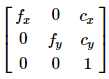

### By comparing the camera matrix above with cmtx we obtain:

### focal length = (536.33, 536.57)

### optical center (or principal point) = (334.39, 239.67)

### skew coefficient = 0

### The extrinsic parameters include the: rotation and translation vectors represented as rot and trans in the code above

In [8]:
# First 5 rotation vectors of the camera
print('Rotation vectors:') 
rot[:5]

Rotation vectors:


[array([[-0.44973691],
        [ 0.2709551 ],
        [-3.08364428]]),
 array([[ 0.41744036],
        [ 0.6759187 ],
        [-1.33777932]]),
 array([[-0.27889342],
        [-0.37848891],
        [-2.74592795]]),
 array([[-0.3963507],
        [-0.1662443],
        [-3.1123603]]),
 array([[-0.46399784],
        [-0.29624745],
        [-1.75838963]])]

In [9]:
# First 5 translation vectors of the camera
print('Translation vectors:')
trans[:5]

Translation vectors:


[array([[ 3.99830824],
        [ 0.71076986],
        [14.88922465]]),
 array([[-1.9516727 ],
        [ 1.68386156],
        [12.9020276 ]]),
 array([[3.17159619],
        [2.61610723],
        [9.92260419]]),
 array([[ 2.97145895],
        [ 2.08336624],
        [10.98783069]]),
 array([[-1.0103406 ],
        [ 2.55030361],
        [ 9.63709404]])]